## Single Variable Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
data = pd.read_table('../Dataset/Housing Prices/ex3x.dat',delim_whitespace=True,names=['Area','Bedrooms'])
label = pd.read_table('../Dataset/Housing Prices/ex3y.dat',names=['Price'])

In [4]:
data = pd.concat([data,label],axis=1)

In [5]:
data.head()

,Area,Bedrooms,Price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


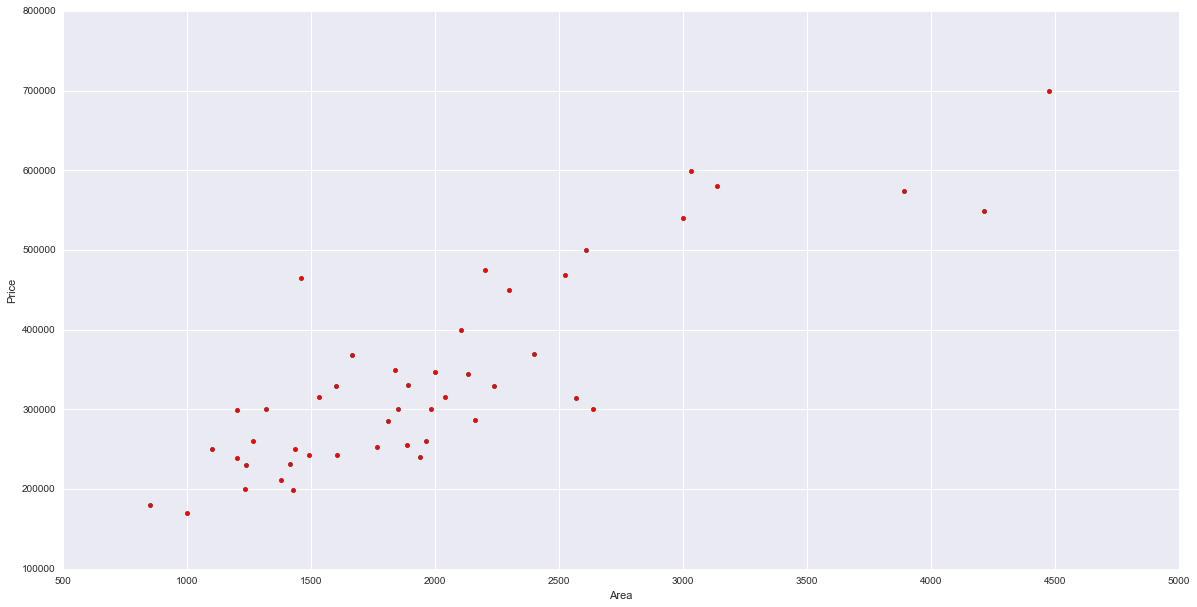

In [6]:
data.plot(kind='scatter',x='Area',y='Price',c='red')

In [7]:
def J(X,y,theta,m):
    
    ''' 
    Return the error for given
    values of theta1 and theta2
    '''
    error = sum(((np.dot(X,theta) - y)**2))/(2*m)
    return error

In [8]:
def gradient(X,y,theta,m):
    
    '''
    Returns the grdient of the
    mean squared error function
    '''
    grad = np.dot(X.T,(np.dot(X,theta) - y))/m
    return grad

In [9]:
X = data[['Area']]

## Standardising the value of house area
X = (X - X.mean())/X.std()

## Adding the bias column to the dataset
X.loc[:,'Bias'] = pd.Series(np.ones(X.shape[0]))
X = X.values

In [10]:
theta = np.asarray([0.0,0.0]).T.reshape(-1,1)

In [11]:
y = label.values

## Standardising the value of house prices
y = (y - y.mean())/y.std()

In [12]:
print X.shape,y.shape,theta.shape

(47, 2) (47, 1) (2, 1)


In [13]:
m = X.shape[0]
print 'Number of training examples: {}'.format(m)

Number of training examples: 47


In [14]:
alpha,i,error,params = 0.01,0,[],[]
print 'Learning Rate: {}'.format(alpha)

Learning Rate: 0.01


In [15]:
while(i < 1000):
    theta = theta - alpha*(gradient(X,y,theta,m))
    params.append(theta)
    error.append(J(X,y,theta,m))
    i += 1

In [16]:
## Predicting the value of dataset using the hypothesis
yPred = np.dot(X,theta)

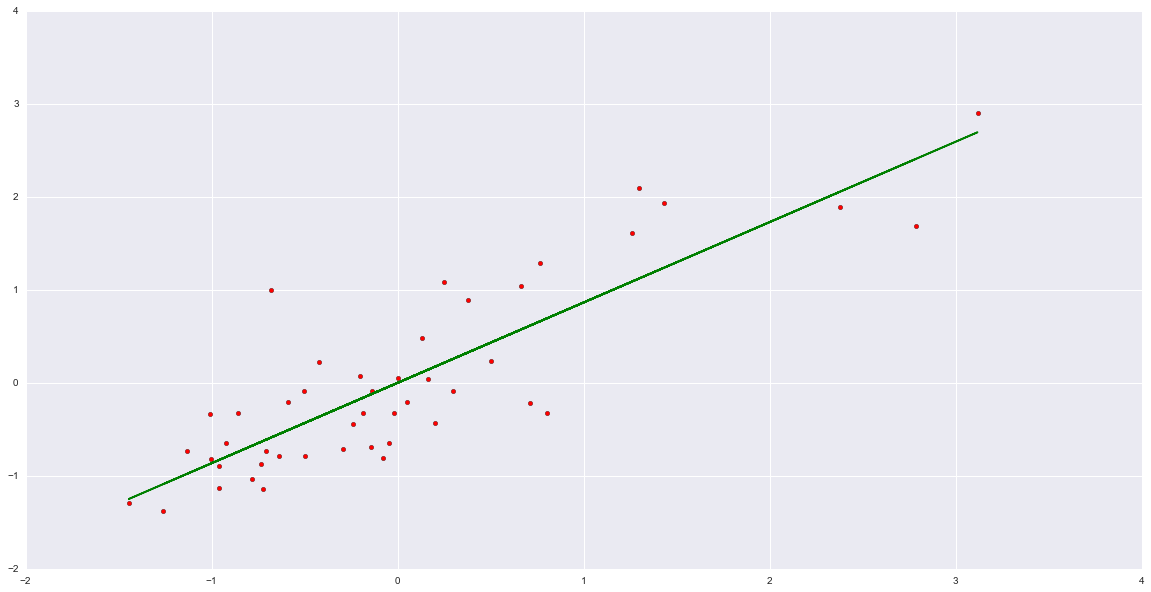

In [17]:
## Plotting the predicted and actual values
plt.scatter(X[:,0],y,c='r',label='Actual')
plt.plot(X[:,0],yPred,c='g',label='Predicted')

In [18]:
params = np.asarray(params).reshape(1000,2)
error = np.asarray(error)

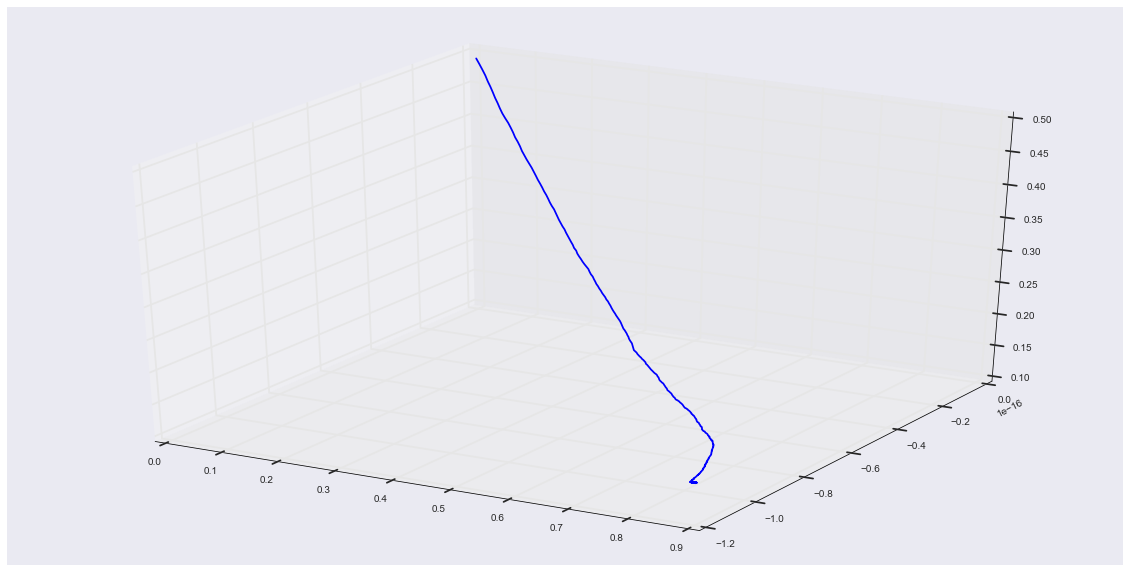

In [19]:
## Plotting the error function as a value of theta
## This should give the path taken by the Batch Gradient Descent to reach the optimal solution
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs=params[:,0],ys=params[:,1],zs=error,c='b')

## Multivariate Linear Regression
Multivariate Linear Regression is similar to Single Variable Linear Regression except for the fact that the number of features and corresponding parameters (theta) are increased accordingly

In [20]:
X = data.copy()

In [21]:
from sklearn.preprocessing import scale
X = scale(X)

In [22]:
y = X[:,-1].reshape(-1,1)

In [23]:
print X.shape,y.shape

(47, 3) (47, 1)


In [24]:
theta = np.asarray([0.0,0.0,0.0]).T.reshape(-1,1)
print theta.shape

(3, 1)


In [25]:
alpha,i,error,params = 0.01,0,[],[]
print 'Learning Rate: {}'.format(alpha)

Learning Rate: 0.01


In [26]:
while(i < 1000):
    theta = theta - alpha*(gradient(X,y,theta,m))
    params.append(theta)
    error.append(J(X,y,theta,m))
    i += 1

In [27]:
yPred = np.dot(X,theta)
print yPred.shape

(47, 1)


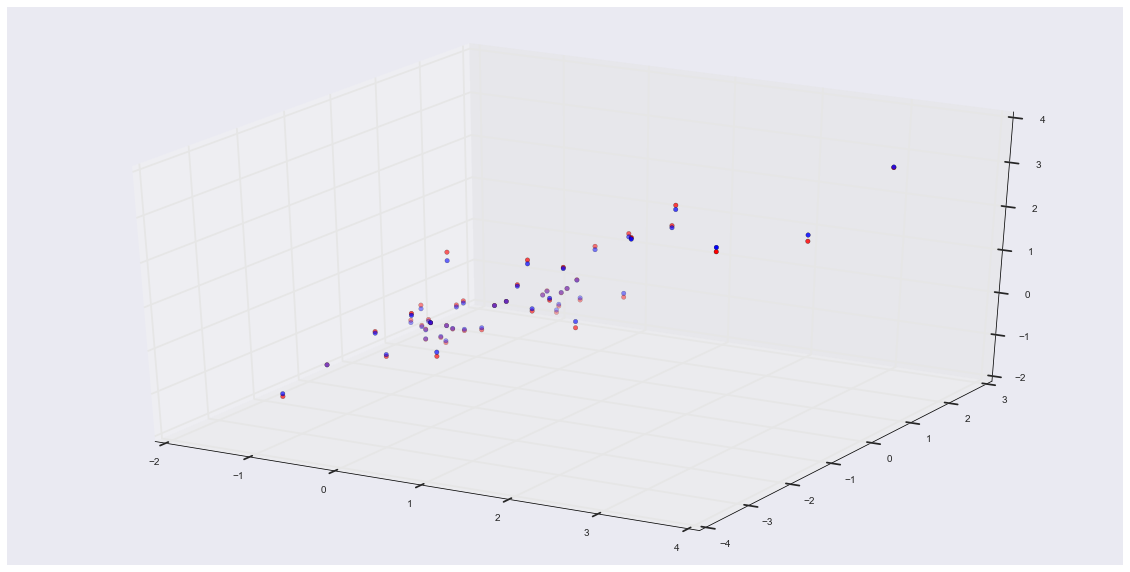

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,c='r')
ax.scatter(X[:,0],X[:,1],yPred,c='b')